**NIMER LOPEZ,  ANDREY RODIGUES**







In [20]:
# Cargando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargando los datos
datos = pd.read_csv('/content/sample_data/churn.csv', delimiter=';', header=0)
print(datos.shape)

(5000, 18)


In [3]:
# Visualizar las primeras filas del conjunto de datos
print("Primeras 5 filas del conjunto de datos:")
print(datos.head())

Primeras 5 filas del conjunto de datos:
  churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightc

In [4]:
# Convertir a dataframe
datos=pd.DataFrame(datos)

In [5]:
#Explorando la estructura del dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [6]:
# Cambiar los nombres de las columnas
new_name = {
    'churn': 'batir',
    'accountlength': 'duracion_cuenta',
    'internationalplan': 'plan_internacional',
    'voicemailplan': 'plan_correo_de_voz',
    'numbervmailmessages': 'num_mensajes_correo',
    'totaldayminutes': 'minutos_totales_dia',
    'totaldaycalls': 'llamadas_totales_dia',
    'totaldaycharge': 'cargo_total_dia',
    'totaleveminutes': 'minutos_totales_tarde',
    'totalevecalls': 'llamadas_totales_tarde',
    'totalevecharge': 'cargo_total_tarde',
    'totalnightminutes': 'minutos_totales_noche',
    'totalnightcalls': 'llamadas_totales_noche',
    'totalnightcharge': 'cargo_total_noche',
    'totalintlminutes': 'minutos_totales_internacionales',
    'totalintlcalls': 'llamadas_totales_internacionales',
    'totalintlcharge': 'cargo_total_internacional',
    'numbercustomerservicecalls': 'num_llamadas_servicio_cliente'
}

datos = datos.rename(columns=new_name)
datos.head()

,abandono,duracion_cuenta,plan_internacional,plan_correo_de_voz,num_mensajes_correo,minutos_totales_dia,llamadas_totales_dia,cargo_total_dia,minutos_totales_tarde,llamadas_totales_tarde,cargo_total_tarde,minutos_totales_noche,llamadas_totales_noche,cargo_total_noche,minutos_totales_internacionales,llamadas_totales_internacionales,cargo_total_internacional,num_llamadas_servicio_cliente
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [8]:
# Verificar qué columnas tienen valores nulos
columnas_con_nulos = datos.columns[datos.isnull().any()]

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

# Conteo de valores nulos por columna
conteo_nulos_por_columna = datos[columnas_con_nulos].isnull().sum()
print("\nConteo de valores nulos por columna:")
print(conteo_nulos_por_columna)
#No hay nulos

Columnas con valores nulos:
Index([], dtype='object')

Conteo de valores nulos por columna:
Series([], dtype: float64)


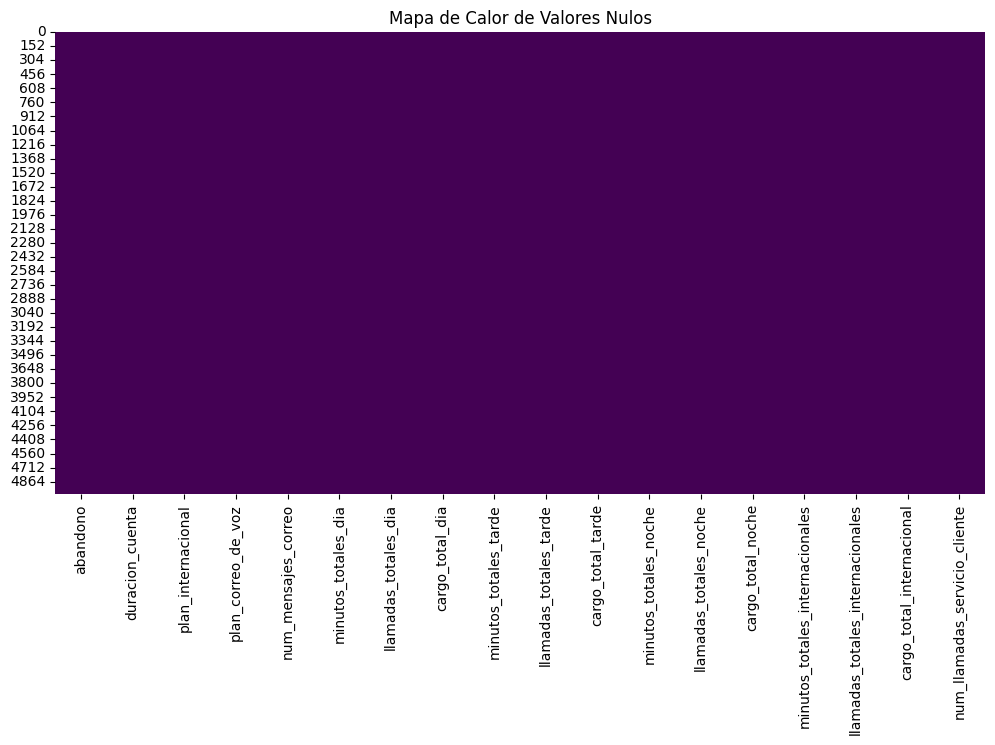

In [9]:
# Mostrar evidencia gráfica
plt.figure(figsize=(12, 6))
sns.heatmap(datos.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()


<Axes: >

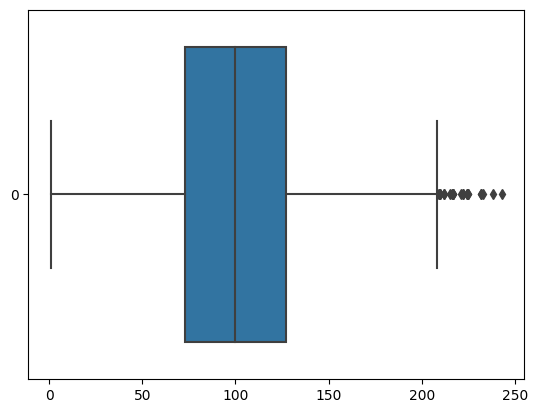

In [ ]:
# Boxplot de la accountlength
sns.boxplot(data=datos['accountlength'], orient="h")

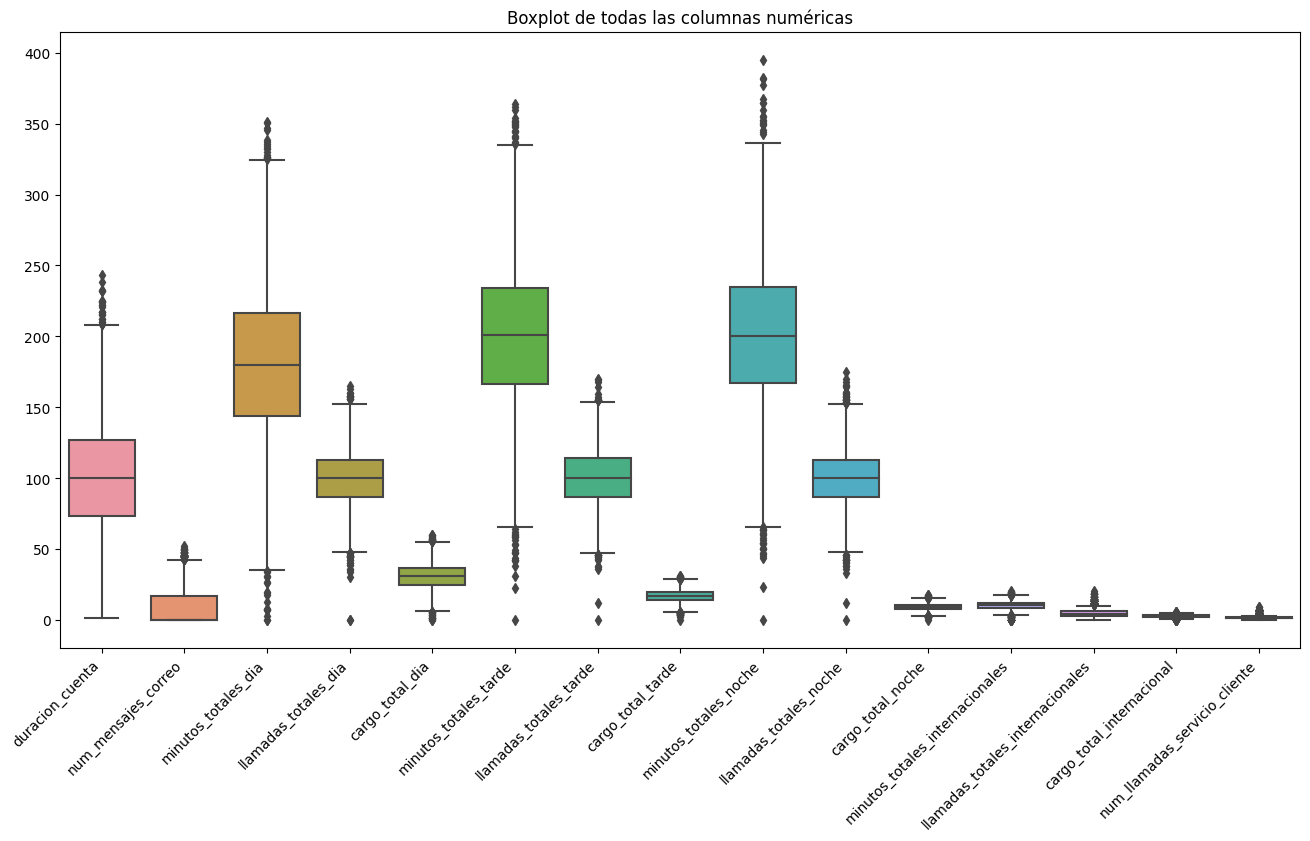

In [13]:
# Selecciona solo las columnas numéricas
columnas_numericas = datos.select_dtypes(include=['float64', 'int64'])

# Boxplot de todas las columnas numéricas
plt.figure(figsize=(16, 8))
sns.boxplot(data=columnas_numericas)
plt.title("Boxplot de todas las columnas numéricas")
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
def imputar_valores_atipicos_con_mediana(datos):
    # Selecciona solo las columnas numéricas
    columnas_numericas = datos.select_dtypes(include=['float64', 'int64'])

    # Identifica y filtra los valores atípicos
    for columna in columnas_numericas.columns:
        # Calcula los cuartiles Q1 y Q3
        Q1 = columnas_numericas[columna].quantile(0.25)
        Q3 = columnas_numericas[columna].quantile(0.75)

        # Calcula el rango intercuartílico (IQR)
        IQR = Q3 - Q1

        # Calcula los límites superior e inferior para identificar los valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtra y reemplaza los valores atípicos por la mediana
        datos[columna] = np.where((datos[columna] < limite_inferior) | (datos[columna] > limite_superior),
                                  columnas_numericas[columna].median(),
                                  datos[columna])

    return datos

In [10]:
#imputar valores nulos con la media
def imputar_nulos_con_media(df, columna):
    media = df[columna].mean()
    df[columna].fillna(media, inplace=True)

In [14]:
# Identifica valores atípicos en todas las columnas numéricas
valores_atipicos = pd.DataFrame()

for columna in columnas_numericas.columns:
    # Calcula los cuartiles Q1 y Q3
    Q1 = columnas_numericas[columna].quantile(0.25)
    Q3 = columnas_numericas[columna].quantile(0.75)

    # Calcula el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcula los límites superior e inferior para identificar los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra los valores atípicos y los agrega al DataFrame de valores atípicos
    valores_atipicos[columna] = columnas_numericas[(columnas_numericas[columna] < limite_inferior) | (columnas_numericas[columna] > limite_superior)][columna]

# Imprime los valores atípicos
print("Valores atípicos:")
# Imputar valores atípicos con la mediana
datos_imputados = imputar_valores_atipicos_con_mediana(valores_atipicos)

# Verificar que los valores atípicos hayan sido imputados
print("Valores atípicos después de la imputación:")
print(datos_imputados[(datos_imputados < limite_inferior) | (datos_imputados > limite_superior)].count())

Valores atípicos:
Valores atípicos después de la imputación:
duracion_cuenta                     24
num_mensajes_correo                  0
minutos_totales_dia                  0
llamadas_totales_dia                 0
cargo_total_dia                      0
minutos_totales_tarde                0
llamadas_totales_tarde               0
cargo_total_tarde                    0
minutos_totales_noche                0
llamadas_totales_noche               0
cargo_total_noche                    0
minutos_totales_internacionales      0
llamadas_totales_internacionales     0
cargo_total_internacional            0
num_llamadas_servicio_cliente        2
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

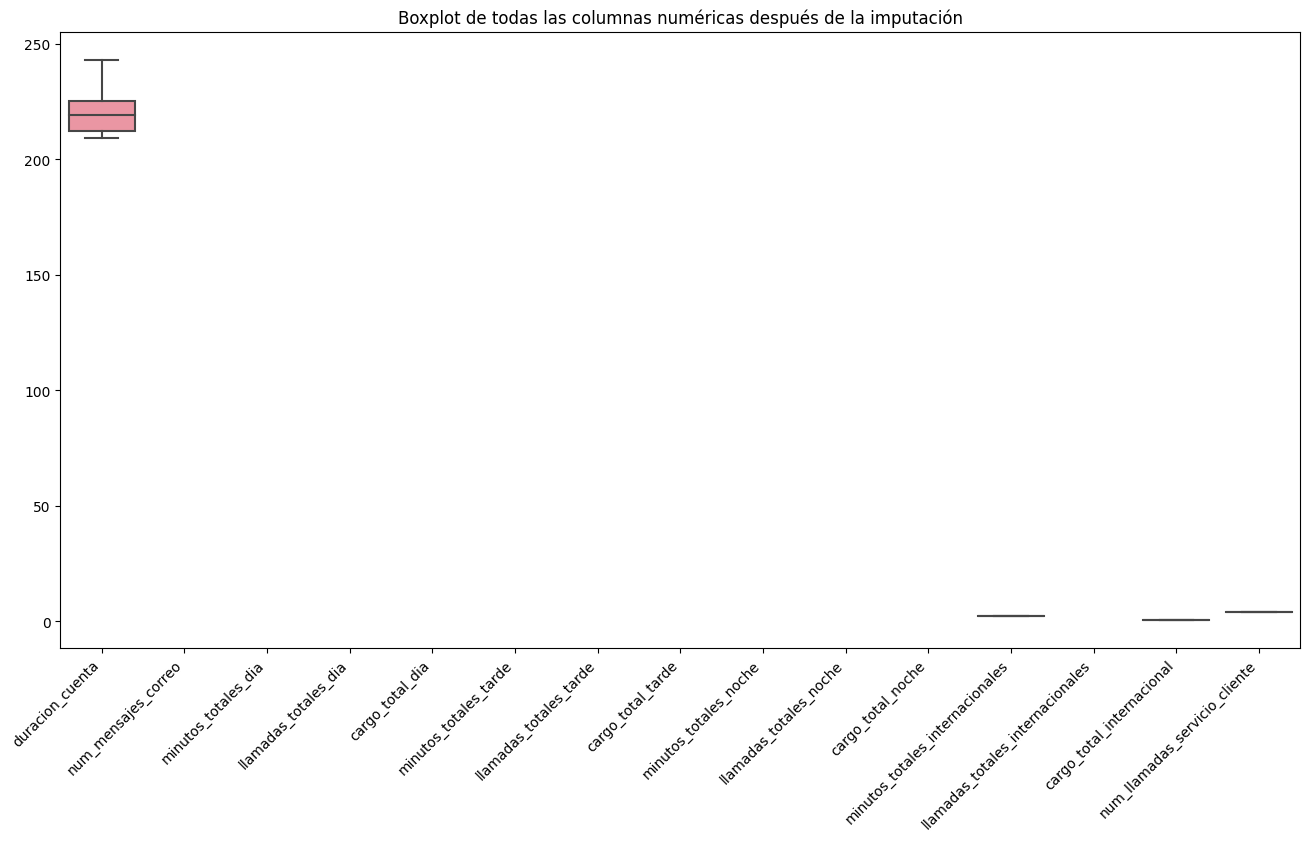

In [16]:
# Selecciona solo las columnas numéricas
columnas_numericas = datos_imputados.select_dtypes(include=['float64', 'int64'])

# Boxplot de todas las columnas numéricas después de la imputación
plt.figure(figsize=(16, 8))
sns.boxplot(data=columnas_numericas)
plt.title("Boxplot de todas las columnas numéricas después de la imputación")
plt.xticks(rotation=45, ha='right')
plt.show()

La variable dependiente es batir, ya que es la que se desea calcular.

In [17]:
datos.head()

,abandono,duracion_cuenta,plan_internacional,plan_correo_de_voz,num_mensajes_correo,minutos_totales_dia,llamadas_totales_dia,cargo_total_dia,minutos_totales_tarde,llamadas_totales_tarde,cargo_total_tarde,minutos_totales_noche,llamadas_totales_noche,cargo_total_noche,minutos_totales_internacionales,llamadas_totales_internacionales,cargo_total_internacional,num_llamadas_servicio_cliente
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [18]:
# Convertir datos de texto a numericos
datos['plan_internacional'] = datos['plan_internacional'].map({'no': '0', 'yes':'1'})
datos['plan_correo_de_voz'] = datos['plan_correo_de_voz'].map({'no': '0', 'yes': '1'})
datos['abandono'] = datos['abandono'].map({'No': '0', 'Yes':'1'})

# Convertir datos al tipo de datos adecuado
datos = datos.astype({
    'batir': 'int64',
    'duracion_cuenta': 'int64',
    'num_mensajes_correo': 'int64',
    'minutos_totales_dia': 'float64',
    'llamadas_totales_dia': 'int64',
    'cargo_total_dia': 'float64',
    'minutos_totales_tarde': 'float64',
    'llamadas_totales_tarde': 'int64',
    'cargo_total_tarde': 'float64',
    'minutos_totales_noche': 'float64',
    'llamadas_totales_noche': 'int64',
    'cargo_total_noche': 'float64',
    'minutos_totales_internacionales': 'float64',
    'llamadas_totales_internacionales': 'int64',
    'cargo_total_internacional': 'float64',
    'num_llamadas_servicio_cliente': 'int64',

})


In [19]:
# Se observa los cambios en las variables de tipo de texto y se les dios el formato
datos.head()

,abandono,duracion_cuenta,plan_internacional,plan_correo_de_voz,num_mensajes_correo,minutos_totales_dia,llamadas_totales_dia,cargo_total_dia,minutos_totales_tarde,llamadas_totales_tarde,cargo_total_tarde,minutos_totales_noche,llamadas_totales_noche,cargo_total_noche,minutos_totales_internacionales,llamadas_totales_internacionales,cargo_total_internacional,num_llamadas_servicio_cliente
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [24]:
# Selecciona las columnas numéricas del DataFrame 'datos'
datos_numericos = datos.select_dtypes(include=['float64', 'int64']).columns

In [25]:
# Crea una instancia de ColumnTransformer para estandarizar las columnas numéricas
estandarizacion = ColumnTransformer([('Estandarizados', StandardScaler(), datos_numericos)])

In [26]:
# Aplica la transformación al conjunto de datos 'datos' y almacena el resultado en 'datos_estandarizados'
datos_estandarizados = estandarizacion.fit_transform(datos[datos_numericos])

In [27]:
# Crea un DataFrame con las columnas numéricas estandarizadas y utiliza los nombres de columnas originales
datos_estandarizados_df = pd.DataFrame(datos_estandarizados, columns=datos_numericos)

In [28]:
print("Estadísticas Descriptivas de los Datos Estandarizados:")
print(datos_estandarizados_df.describe())# imprime los resultados

Estadísticas Descriptivas de los Datos Estandarizados:
           abandono  duracion_cuenta  num_mensajes_correo  \
count  5.000000e+03     5.000000e+03         5.000000e+03   
mean   4.689582e-17    -3.055334e-17        -5.968559e-17   
std    1.000100e+00     1.000100e+00         1.000100e+00   
min   -4.058161e-01    -2.500809e+00        -5.725491e-01   
25%   -4.058161e-01    -6.867774e-01        -5.725491e-01   
50%   -4.058161e-01    -6.515398e-03        -5.725491e-01   
75%   -4.058161e-01     6.737466e-01         6.825230e-01   
max    2.464170e+00     3.596354e+00         3.266495e+00   

       minutos_totales_dia  llamadas_totales_dia  cargo_total_dia  \
count         5.000000e+03          5.000000e+03     5.000000e+03   
mean         -2.351896e-16          2.245315e-16     1.818989e-16   
std           1.000100e+00          1.000100e+00     1.000100e+00   
min          -3.345541e+00         -5.044547e+00    -3.345613e+00   
25%          -6.789640e-01         -6.570810e-01  

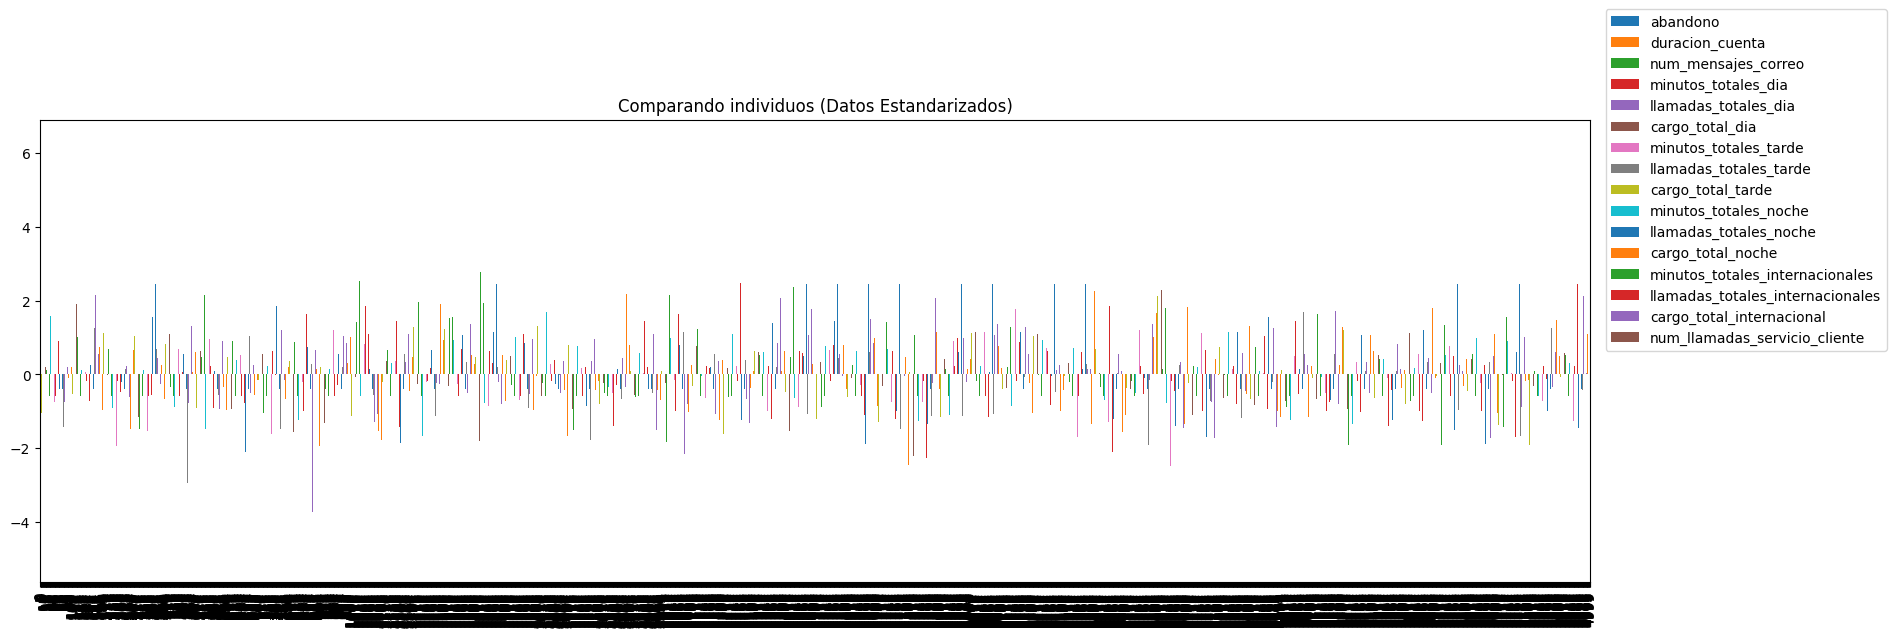

In [29]:
# Crea un gráfico de barras con los datos estandarizados
datos_estandarizados_df.plot(kind="bar", figsize=(20, 6))

# Agrega una leyenda al gráfico
plt.legend(loc=(1.01, 0.5))

# Agrega un título al gráfico
plt.title("Comparando individuos (Datos Estandarizados)")

# Muestra el gráfico
plt.show()

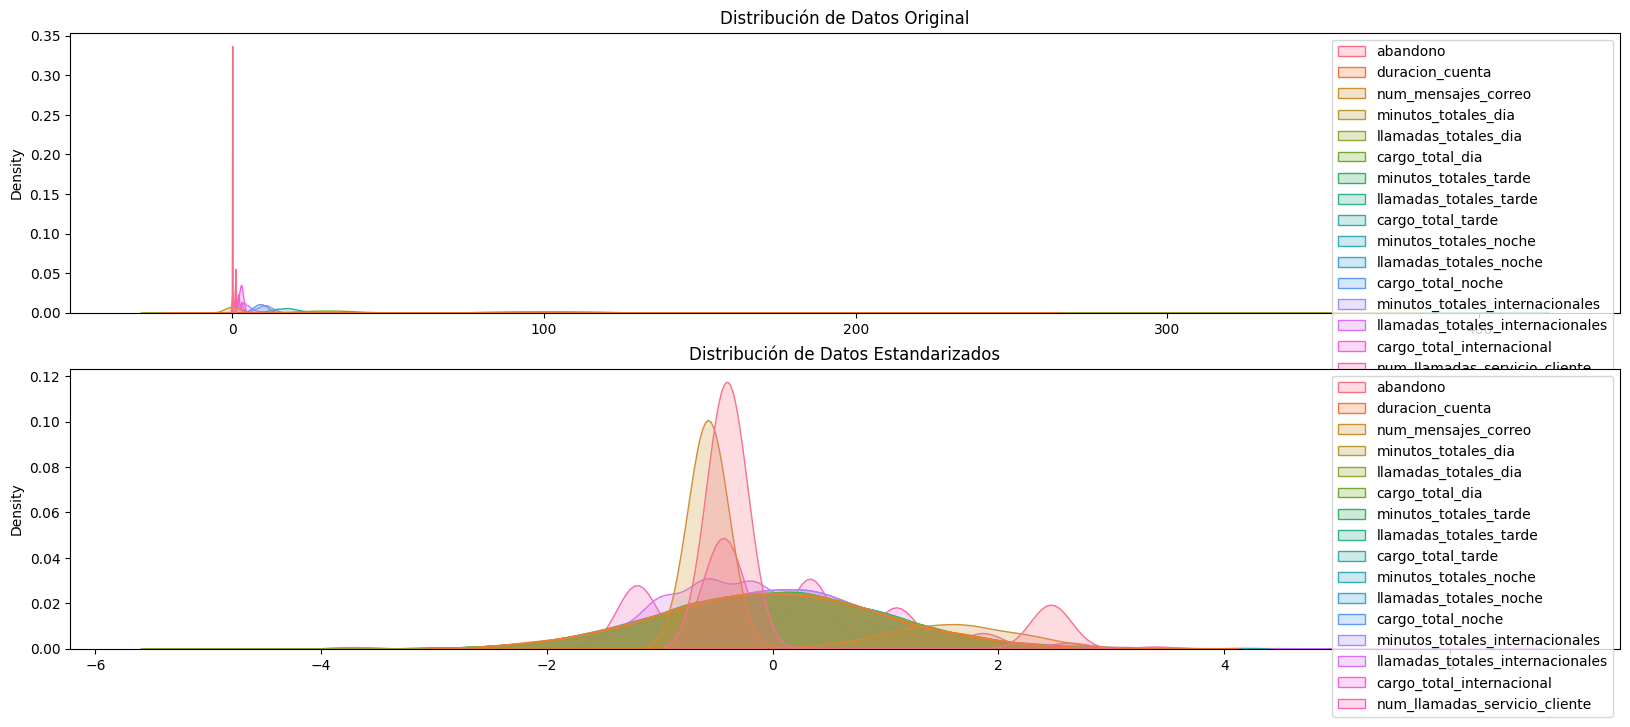

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
# Densidad de los datos originales
sns.kdeplot(data=datos[datos_numericos], fill=True, ax=axes[0])
axes[0].set_title('Distribución de Datos Original')

# Densidad de los datos estandarizados
sns.kdeplot(data=datos_estandarizados_df, fill=True, ax=axes[1])
axes[1].set_title('Distribución de Datos Estandarizados')

plt.show()

<ipython-input-33-124c5494db00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = datos.corr()


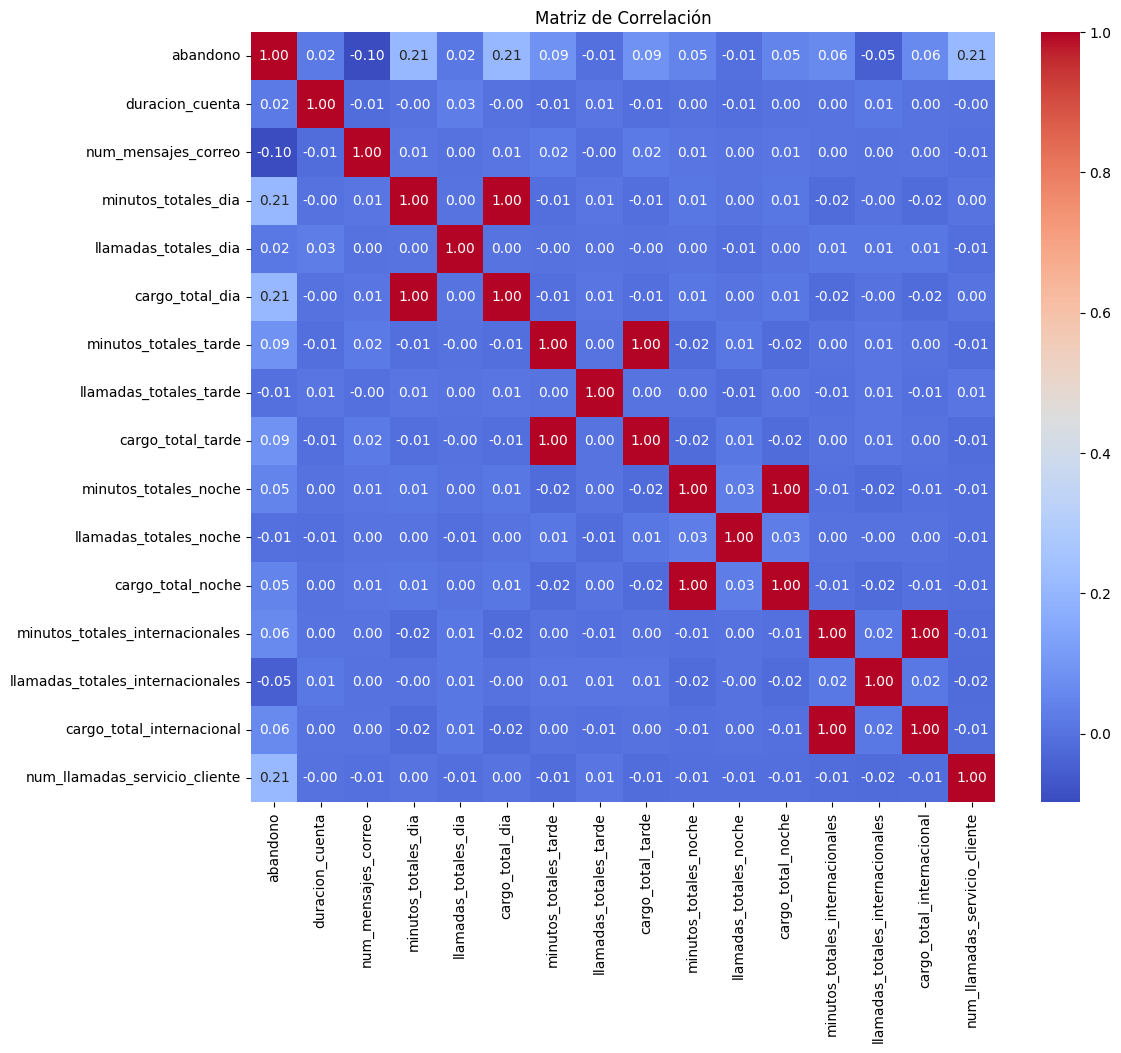

In [33]:
# Calcular la matriz de correlación
matriz_correlacion = datos.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

ACP

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
# Seleccionar las columnas para ACP
columnas_acp = ['duracion_cuenta', 'num_mensajes_correo', 'minutos_totales_dia', 'llamadas_totales_dia',
                'cargo_total_dia', 'minutos_totales_tarde', 'llamadas_totales_tarde', 'cargo_total_tarde',
                'minutos_totales_noche', 'llamadas_totales_noche', 'cargo_total_noche',
                'minutos_totales_internacionales', 'llamadas_totales_internacionales', 'cargo_total_internacional',
                'num_llamadas_servicio_cliente']

# Aplicar ACP
pca = PCA()
datos_acp = pca.fit_transform(datos[columnas_acp])

In [37]:
# Determinar cuántos componentes principales retener
varianza_explicada = pca.explained_variance_ratio_
componentes_principales = len(varianza_explicada)

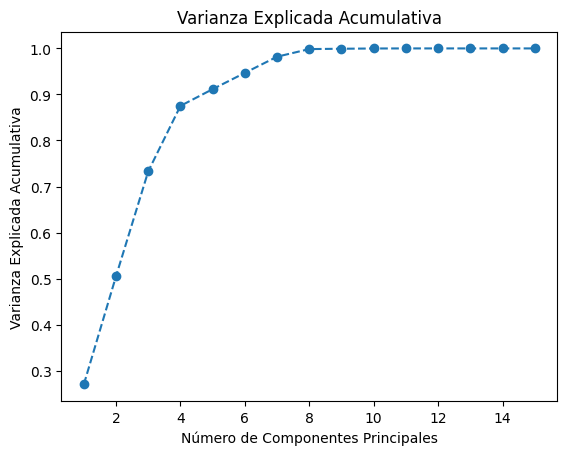

In [38]:
# Visualizar la varianza explicada acumulativa
plt.plot(range(1, componentes_principales + 1), np.cumsum(varianza_explicada), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()

In [42]:
# Seleccionar el número de componentes principales que explican la mayor parte de la varianza
# Aquí puedes ajustar el criterio para seleccionar el número de componentes
# Por ejemplo, podrías utilizar un umbral de varianza explicada acumulativa mínima deseada.
umbral_varianza = 0.95
numero_componentes = np.argmax(np.cumsum(varianza_explicada) >= umbral_varianza) + 1

In [43]:
# Crear un nuevo DataFrame con los componentes principales seleccionados
columnas_componentes_principales = [f'CP{i+1}' for i in range(numero_componentes)]
datos_acp_df = pd.DataFrame(datos_acp[:, :numero_componentes], columns=columnas_componentes_principales)

In [41]:
# Concatenar los datos de ACP con las columnas no incluidas en ACP
datos = pd.concat([datos.drop(columns=columnas_acp), datos_acp_df], axis=1)

In [44]:
# Guardar el dataset resultante de ACP en un archivo CSV
datos.to_csv('churn_process.csv', index=False)